### Análisis Baseline para Predicción de Inversión y Stock en Retail
En este notebok desarrollamos un modelo baseline utilizando K-Means y PCA para evaluar la viabilidad del problema de predicción de inversión de stock en una empresa de retail.
La implementación de un baseline ayuda a establecer un punto de referencia inicial para medir futuros modelos más complejos y proporciona una comprensión clara de las capacidades predictivas de los datos actuales.

In [21]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


### Carga y Limpieza de Datos
- Se cargan los datos desde el archivo `datos_retail_trans.csv`, que es el que contiene los datos curados.
- Se eliminan filas con valores nulos para evitar problemas en el análisis de K-means.
- Se seleccionan solo las columnas numéricas y se eliminan las columnas con un solo valor único, ya que no aportan información para el clustering.

In [25]:

# Cargamos datos que hemos transformado
df = pd.read_csv('datos_retail_trans.csv')

# Nos aseguramos que no haya valores nulos
df.dropna(inplace=True)

# Seleccionamos solo variables numéricas
X = df.select_dtypes(include=['number'])

### Escalado de Datos
- Se normalizan los datos utilizando `StandardScaler` para asegurar que todas las variables estén en la misma escala.
- Esto es basico para K-Means, ya que el algoritmo funciona con distancias y puede verse afectado por diferencias en las magnitudes de las variables.

In [26]:
# Vamos a seleccionar solamente las columnas con 
# las que se puede generar clusters
X = X.loc[:, X.nunique() > 1]

# Normalizamos los datos para que esten en la misma escala
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### Aplicación de K-Means
- Se configura K-Means con 20 clusters y se utiliza el algoritmo `elkan` para mejorar la eficiencia.
- Se calcula el **Silhouette Score** para evaluar la calidad del clustering. Un valor cercano a 1 indica clusters bien separados, mientras que un valor cercano a 0 o negativo sugiere que los clusters podrían estar solapados.

In [53]:
# Aplicamos K-Means con una cantidad de clusters arbitraria
kmeans = KMeans(n_clusters=20, random_state=42, n_init=10, algorithm='elkan')
kmeans.fit(X_scaled)
labels = kmeans.labels_

In [54]:
# Evaluamos el clustering
score = silhouette_score(X_scaled, labels)
print("Silhouette Score para K-Means:", score)

Silhouette Score para K-Means: 0.41037115016893544


### Reducción de Dimensionalidad con PCA
- Se aplica PCA para reducir los datos a 3 dimensiones y de esta forma visualizar los clusters en un gráfico 3D.
- Esto es útil para entender la estructura de los clusters.

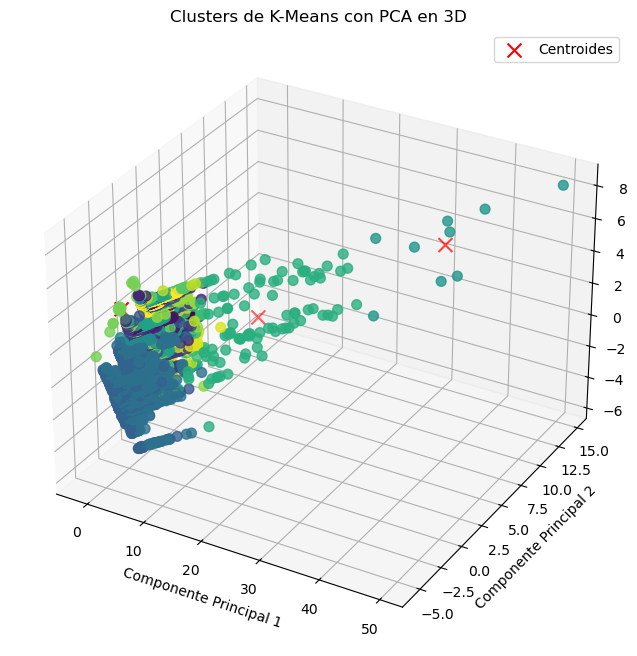

In [55]:
# Baseline con PCA
# Aplicamos PCA a 3 dimensiones
pca = PCA(n_components=3)
X_pca_3d = pca.fit_transform(X_scaled)

# Graficamos los clusters en 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=labels, cmap='viridis', s=50, alpha=0.8)
ax.scatter(pca.transform(kmeans.cluster_centers_)[:, 0], pca.transform(kmeans.cluster_centers_)[:, 1], pca.transform(kmeans.cluster_centers_)[:, 2], c='red', marker='x', s=100, label='Centroides')
ax.set_title('Clusters de K-Means con PCA en 3D')
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
ax.legend()
plt.show()

### Preguntas y Respuestas del Análisis:
- ¿Qué algoritmo se puede utilizar como baseline para predecir las variables objetivo?
Utilizamos K-Means como baseline debido a su simplicidad y capacidad para identificar patrones en los datos mediante agrupación.

- ¿Se puede determinar la importancia de las características para el modelo generado?
Con PCA, observamos las componentes principales para identificar qué características contribuyen más a la variabilidad de los datos.

- ¿El modelo está sub/sobreajustando los datos de entrenamiento?
El Silhouette Score obtenido (~0.12 con 3 clusters, ~0.37 con 10 clusters y ~0.41 con 20) sugiere que los clusters no están tan bien definidos. Esto apunta a  posibles limitaciones en los datos y la necesidad de un modelo más avanzado. Actualmente, el baseline sugiere subajuste y necesidad de mejoras.

- ¿Cuál es la métrica adecuada para este problema de negocio?
Silhouette Score es una métrica adecuada para clustering, ya que mide qué tan separados y coherentes están los clusters. Para futuros modelos supervisados, métricas como MAE o RMSE serían más adecuadas para evaluar la precisión de predicciones de ventas o stock.

- ¿Cuál debería ser el desempeño mínimo a obtener?
El baseline proporciona un punto de partida con un Silhouette Score bajo (~0.41 con 20 clusters). Un desempeño mínimo aceptable estaria entre ~0.65 y ~0.8